In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
companies = pd.read_csv('1000_Companies.csv')
df = pd.DataFrame(companies)
X = companies.iloc[:,:-1].values
Y = companies.iloc[:,4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
sns.heatmap(companies.corr())

ValueError: could not convert string to float: 'New York'

In [3]:
df1 = df.copy()

In [4]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['State']= labelencoder.fit_transform(df1['State'])
df1['State'].unique()

array([2, 0, 1])

In [5]:
X = pd.DataFrame(companies['Profit'])
Y = pd.DataFrame(companies['Marketing Spend'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700, 1)
(300, 1)
(700, 1)
(300, 1)


In [6]:
from sklearn.linear_model import LinearRegression
# reg = LinearRegression()
# reg.fit(X_train, y_train)
# Create Linear Regression Object
lm1 = LinearRegression()
X1 = companies[['Profit']]
Y1 = companies[['Marketing Spend']] # Target
lm1.fit(X1,Y1)
print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)
# Prediction
Yout1 = lm1.predict(X1)
# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])

Intercept for the model is [-7939.31669226] and the scope is [[1.95861051]]
Predicted Values: [[368626.7251607 ]
 [367706.62869911]
 [366253.98603852]
 [350294.44411886]
 [317558.13004221]]
Actual Values: [[471784.1 ]
 [443898.53]
 [407934.54]
 [383199.62]
 [366168.42]]


In [7]:
y_pred=lm1.predict(X_test)
x_pred= lm1.predict(X_train)  
x_pred


array([[314104.42888033],
       [242224.39641273],
       [336199.35251361],
       [267970.29500514],
       [209971.32932911],
       [348582.88392056],
       [110851.20915095],
       [177304.97599743],
       [119799.61145016],
       [211532.44747859],
       [238789.26738333],
       [328912.46176401],
       [147795.99643736],
       [233418.21814599],
       [163741.8217571 ],
       [244677.34278996],
       [347572.25656375],
       [ 88993.78664829],
       [279830.1070831 ],
       [178257.04048853],
       [155708.67303953],
       [125560.52189505],
       [352640.45232059],
       [219794.82791651],
       [368626.7251607 ],
       [271999.41850467],
       [332958.31767316],
       [126557.76342209],
       [328330.17978475],
       [238809.34607903],
       [158365.75285562],
       [353584.15062647],
       [ 97139.13797305],
       [239425.09248581],
       [193051.68769913],
       [106012.24517321],
       [118728.74804545],
       [126654.81041863],
       [1611

In [8]:
y_pred


array([[158168.3124002 ],
       [141613.4335396 ],
       [300599.83738819],
       [293744.63849806],
       [ 92452.43737563],
       [ 94851.8406884 ],
       [174112.46449856],
       [291532.63627329],
       [181641.97277869],
       [ 20815.82772127],
       [169414.05133192],
       [267896.67318622],
       [332588.53514172],
       [188774.92688743],
       [208283.04623747],
       [260087.73654444],
       [184985.07445609],
       [297843.87300716],
       [ 93265.62427702],
       [121864.36993916],
       [195566.5434044 ],
       [319652.83989699],
       [120375.20052432],
       [239615.83999697],
       [160049.01624396],
       [330707.83129796],
       [289344.05922614],
       [261799.44461784],
       [120293.21253976],
       [327445.044325  ],
       [157325.00747486],
       [304324.43416624],
       [298672.28338505],
       [105451.71511103],
       [238133.36358516],
       [102014.91287984],
       [136170.43566553],
       [165361.50265477],
       [2228

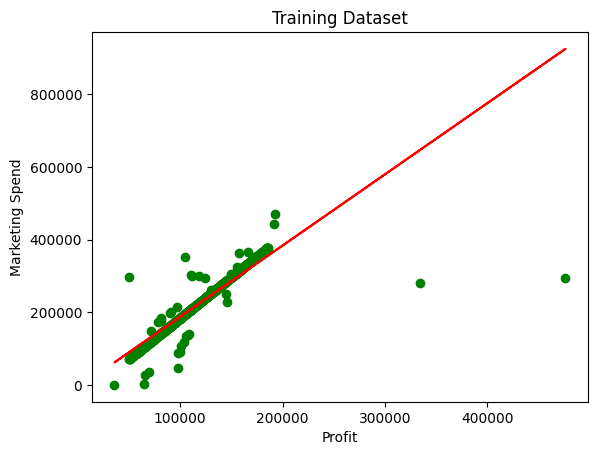

In [9]:
plt.scatter(X_train, Y_train, color="green")   
plt.plot(X_train, x_pred, color="red")    
plt.title("Training Dataset")  
plt.xlabel("Profit")  
plt.ylabel("Marketing Spend")  
plt.show() 

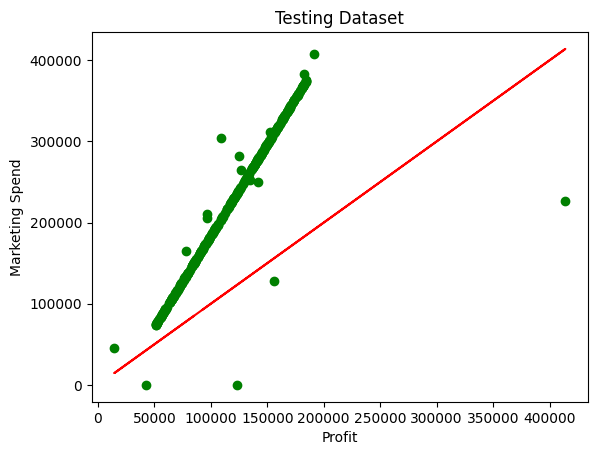

In [10]:
plt.scatter(X_test, Y_test, color="green")   
plt.plot(X_test, X_test, color="red")    
plt.title("Testing Dataset")  
plt.xlabel("Profit")  
plt.ylabel("Marketing Spend")  
plt.show() 

In [11]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8109243647046783